In [72]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [73]:
# Define your W&B project and group identifiers

# guidance:
# mpc_eth/0423_US_guidance_ben_1_human
# mpc_eth/0423_US_net_guidance_ben_1_human
# expert level = 1.89
# title = PPO US navigation

# expert_level = 1.89
# title = 'DRL US navigation'
# group_1 = {
#     "project": "mpc_eth/0423_US_guidance_ben_1_human",
#     "group_name": "MB-US-sim",
# }

# group_2 = {
#     "project": "mpc_eth/0423_US_net_guidance_ben_1_human",
#     "group_name": "LB-US-sim",
# }

# group_4 = {
#     "project": "mpc_eth/0512_guidance_a2c_1_human_ben",
#     "group_name": "MB-US-sim",
# }

# group_5 = {
#     "project": "mpc_eth/0512_a2c_net_1_human_b",
#     "group_name": "LB-US-sim",
# }


# label_list = ['PPO-MB', 'PPO-LB', 'A2C-MB', 'A2C-LB']
# reference_label = 'expert'
# reference_color = 'darkred'

# surgery:
# mpc_eth/0501_ppo_surgery_1_human_ben
# mpc_eth/0501_ppo_net_surgery_1_human_ben
# expert level = 31.9
# title = PPO US-guided-surgery

# expert_level = 31.9
# title = 'DRL US-guided-surgery'
# group_1 = {
#     "project": "mpc_eth/0501_ppo_surgery_1_human_ben",
#     "group_name": "MB-US-sim",
# }

# group_2 = {
#     "project": "mpc_eth/0501_ppo_net_surgery_1_human_ben",
#     "group_name": "LB-US-sim",
# }

# group_4 = {
#     "project": "mpc_eth/0513_a2c_surgery_1_human_ben",
#     "group_name": "MB-US-sim",
# }

# group_5 = {
#     "project": "mpc_eth/0513_a2c_net_surgery_1_human_ben",
#     "group_name": "LB-US-sim",
# }

# label_list = ['PPO-MB', 'PPO-LB', 'A2C-MB', 'A2C-LB']
# reference_label = 'expert'
# reference_color = 'darkred'


# recontruction
# mpc_eth/0501_ppo_recon_1_human_ben
# heuristic level = 4.98

expert_level = 4.98
title = 'Submodular DRL US reconstruction'
group_1 = {
    "project": "mpc_eth/0501_ppo_recon_1_human_ben",
    "group_name": "MB-US-sim",
}

group_2 = {
    "project": "mpc_eth/0501_ppo_recon_1_human_ben",
    "group_name": "LB-US-sim",
}




group_4 = {
    "project": "mpc_eth/0512_a2c_reconstruction_ben_sweep",
    "group_name": "MB-US-sim",
}

group_5 = {
    "project": "mpc_eth/0512_a2c_reconstruction_ben_sweep",
    "group_name": "LB-US-sim",
}

label_list = ['PPO', 'A2C']
reference_label = 'heuristic'
reference_color = 'darkgreen'


# # Metric names (change if yours are different)
x_key = "_step"         # e.g., "global_step", "timestep", or "epoch"
y_key = "total_reward" # e.g., "reward", "episode_return", etc.
groups = [group_1, group_2, group_4, group_5]

In [74]:
# Download function
def download_group_runs(project_path, group_name):
    api = wandb.Api()
    runs = api.runs(project_path)
    all_curves = []

    

    for run in runs:
        history = run.history()

        print(history.columns.tolist())
        try:
            df = run.history(keys=[x_key, y_key])
            
            # df = df[[x_key, y_key]].dropna()
            print(df)
            df = df.rename(columns={x_key: "x", y_key: "y"})
            all_curves.append(df)
        except Exception as e:
            print(f"Failed to load run {run.name}: {e}")

    return all_curves

In [75]:
# Align curves by interpolation to common x-axis
def align_curves(curves, num_points=1000, max_x=400):
    common_x = np.linspace(
        0,
        max_x,
        num_points
    )

    interpolated = []
    for df in curves:
        # print(df['x'], df['y'])
        interp_y = np.interp(common_x, df["x"], df["y"])
        interpolated.append(interp_y)

    return common_x, np.array(interpolated)


In [76]:
# Download and process both groups
group_curves_list = []
x_list = []
y_all_list = []
for group in groups:
    curves = download_group_runs(group["project"], group["group_name"])
    group_curves_list.append(curves)
    x, y_all = align_curves(curves)
    x_list.append(x)
    y_all_list.append(y_all)



['total_pos_l', 'total_rot_l', 'total_length', 'total_reward', '_step', '_runtime', 'cov_ratio', '_timestamp']
     _step  total_reward
0        5      2.252968
1       15      3.810041
2       30      6.040045
3       35      6.212846
4       55      6.106930
..     ...           ...
495  10410      6.813267
496  10425      6.786442
497  10430      6.826297
498  10440      6.832931
499  10445      6.801585

[500 rows x 2 columns]
['_timestamp', 'total_pos_l', 'total_rot_l', 'total_length', 'total_reward', '_step', '_runtime', 'cov_ratio']
     _step  total_reward
0       20      5.734038
1       45      6.080337
2       60      6.583977
3       80      6.394924
4       85      6.618364
..     ...           ...
495  10350      7.042363
496  10395      7.115887
497  10400      7.035083
498  10425      7.105976
499  10430      7.103752

[500 rows x 2 columns]
['_timestamp', 'total_pos_l', 'total_rot_l', 'total_length', 'total_reward', '_step', '_runtime', 'cov_ratio']
     _step  total_r

[[2.25296831 2.25296831 2.25296831 ... 6.44935612 6.44955001 6.44974391]
 [5.73403835 5.73403835 5.73403835 ... 6.60325302 6.60154206 6.5998311 ]
 [6.1744957  6.1744957  6.1744957  ... 6.96200174 6.96295199 6.96390224]
 [2.60666752 2.60666752 2.60666752 ... 6.72707124 6.72882882 6.73058641]
 [2.50612736 2.50612736 2.50612736 ... 6.82901134 6.82939358 6.82977581]]
[[2.25296831 2.25296831 2.25296831 ... 6.44935612 6.44955001 6.44974391]
 [3.29238129 3.29238129 3.29238129 ... 6.13838312 6.14336531 6.1483475 ]
 [2.62522006 2.62522006 2.62522006 ... 6.90643047 6.90597968 6.9055289 ]
 [3.98275089 3.98275089 3.98275089 ... 6.77495843 6.77598294 6.77700746]
 [6.09516144 6.09516144 6.09516144 ... 6.73372687 6.73412103 6.73451519]]


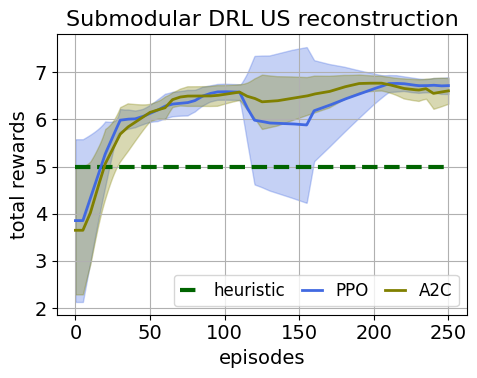

In [79]:
# Plotting
plt.figure(figsize=(5, 4))

color_list = ['royalblue', 'olive', 'indigo', 'darkgreen']

def plot_mean_and_std(x, ys, label, color):
    mean = ys.mean(axis=0)
    print(ys)
    std = ys.std(axis=0)
    plt.plot(x, mean, label=label, color=color, linewidth=2)
    plt.fill_between(x, mean - std, mean + std, alpha=0.3, color=color)

plt.plot(x_list[0], np.ones_like(x_list[0]) * expert_level, label=reference_label, color=reference_color, linestyle="--", linewidth=3)

for (x, y_all, label, color) in zip(x_list, y_all_list, label_list, color_list):
    plot_mean_and_std(x, y_all, label, color)
    
plt.rcParams.update({
    "font.size": 14,          # Base font size
    "axes.titlesize": 16,     # Title size
    "axes.labelsize": 14,     # X/Y label size
    "xtick.labelsize": 14,    # Tick label size
    "ytick.labelsize": 14,
    "legend.fontsize": 12,    # Legend text size
    "figure.titlesize": 18    # Figure title (if used)
})

plt.xlabel('episodes')
plt.ylabel('total rewards')
plt.title(title)
# plt.ylim(-1.2, 2.2)
plt.legend(ncol=3, handlelength=1.2, columnspacing=1.0, loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()